In [4]:
from pyod.utils.data import generate_data_clusters
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# Ex 1

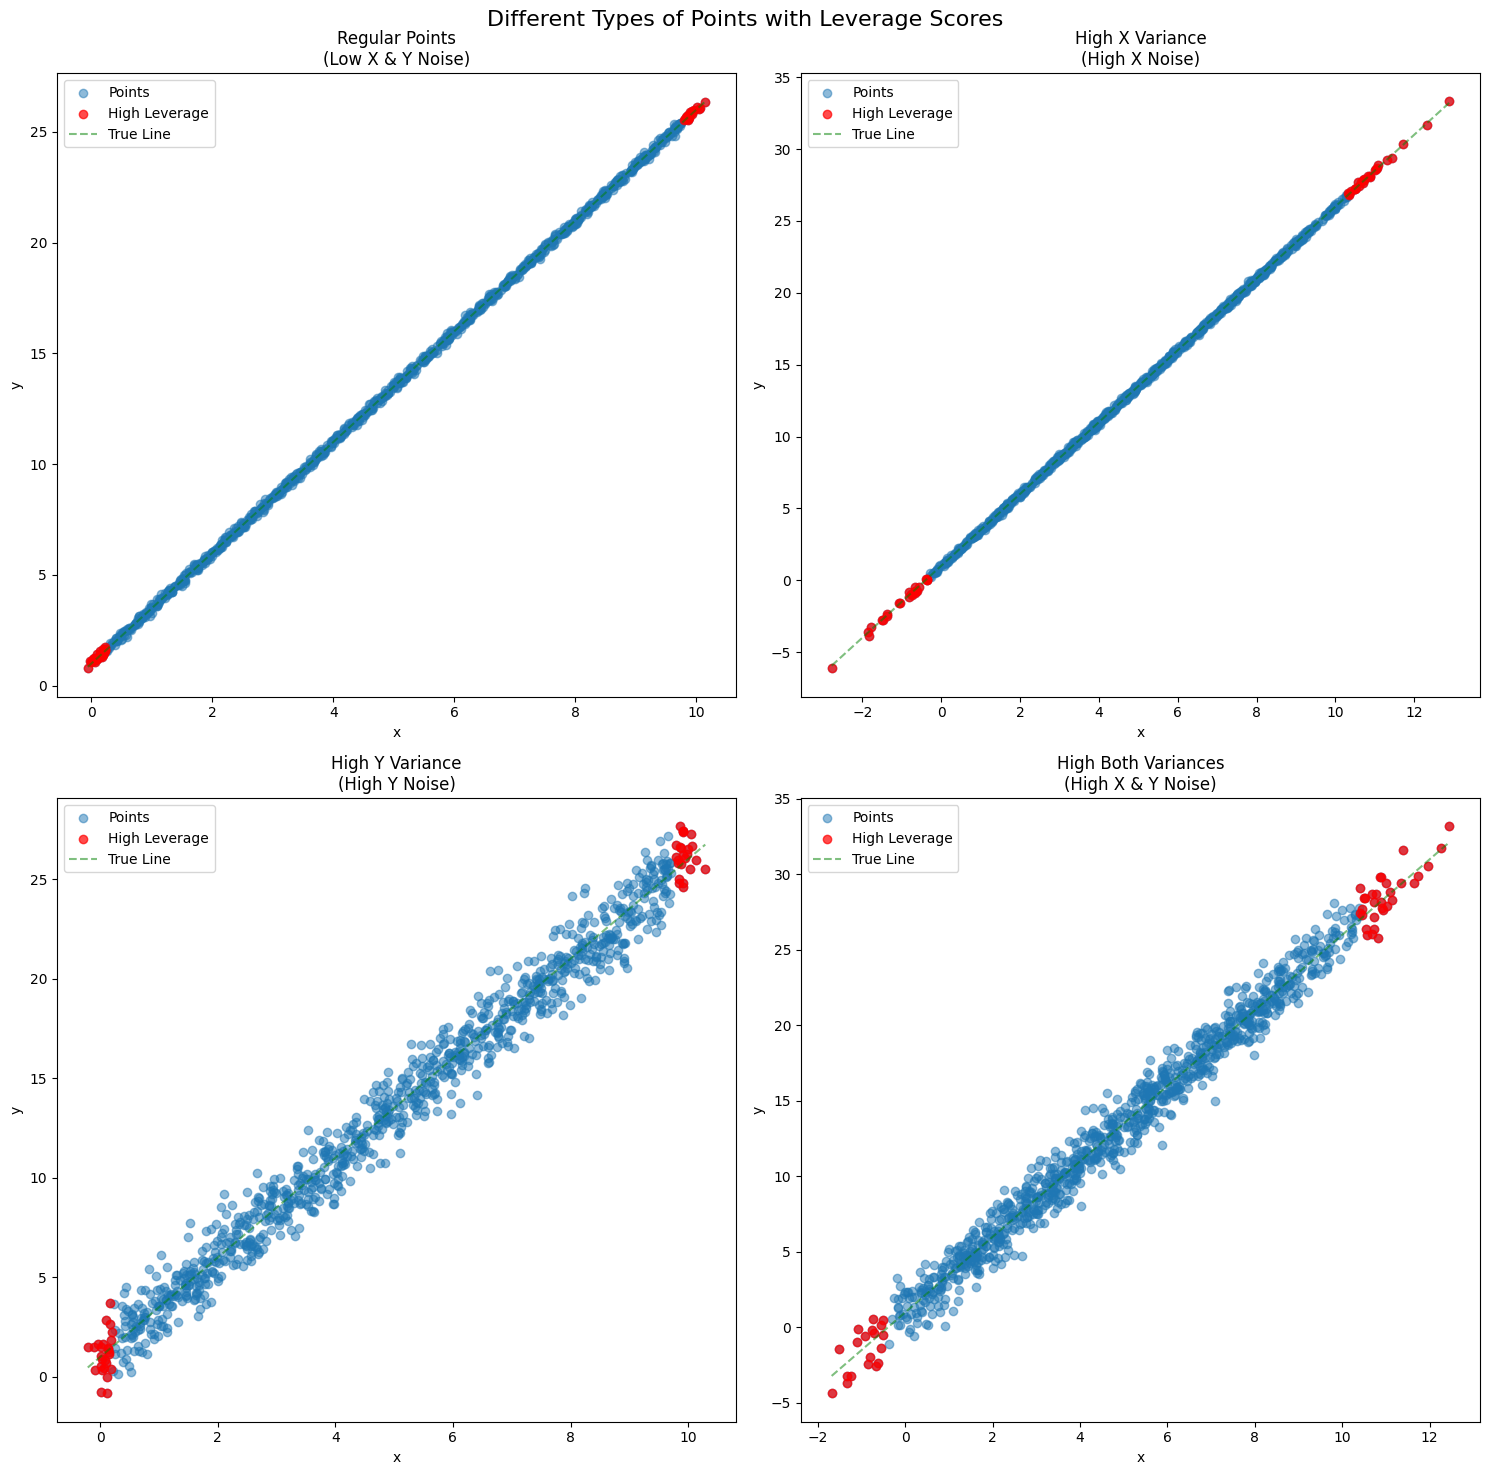

In [3]:
n_samples = 1000
a = 2.5
b = 1.0

def generate_points(x_sigma, y_sigma, n_points=1000):
    x_base = np.linspace(0, 10, n_points)
    x = x_base + np.random.normal(0, x_sigma, n_points)
    epsilon = np.random.normal(0, y_sigma, n_points)
    y = a * x + b + epsilon
    return x, y

def compute_leverage_scores(x):
    x = np.column_stack([x, np.ones_like(x)])
    U, _, _ = np.linalg.svd(x, full_matrices=False)
    
    H = U @ U.T
    
    leverage = np.diag(H)
    
    return leverage

x1, y1 = generate_points(0.1, 0.1)    
x2, y2 = generate_points(1.0, 0.1)    
x3, y3 = generate_points(0.1, 1.0)    
x4, y4 = generate_points(1.0, 1.0)    

lev1 = compute_leverage_scores(x1)
lev2 = compute_leverage_scores(x2)
lev3 = compute_leverage_scores(x3)
lev4 = compute_leverage_scores(x4)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Different Types of Points with Leverage Scores', fontsize=16)

def plot_points(ax, x, y, lev, title):
    ax.scatter(x, y, alpha=0.5, label='Points')
    
    threshold = np.percentile(lev, 95)
    high_leverage = lev >= threshold
    ax.scatter(x[high_leverage], y[high_leverage], color='red', 
              alpha=0.7, label='High Leverage')
    
    x_line = np.linspace(min(x), max(x), 100)
    y_line = a * x_line + b
    ax.plot(x_line, y_line, 'g--', alpha=0.5, label='True Line')
    
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

plot_points(axes[0,0], x1, y1, lev1, 'Regular Points\n(Low X & Y Noise)')
plot_points(axes[0,1], x2, y2, lev2, 'High X Variance\n(High X Noise)')
plot_points(axes[1,0], x3, y3, lev3, 'High Y Variance\n(High Y Noise)')
plot_points(axes[1,1], x4, y4, lev4, 'High Both Variances\n(High X & Y Noise)')

plt.tight_layout()
plt.show()

## 2d case

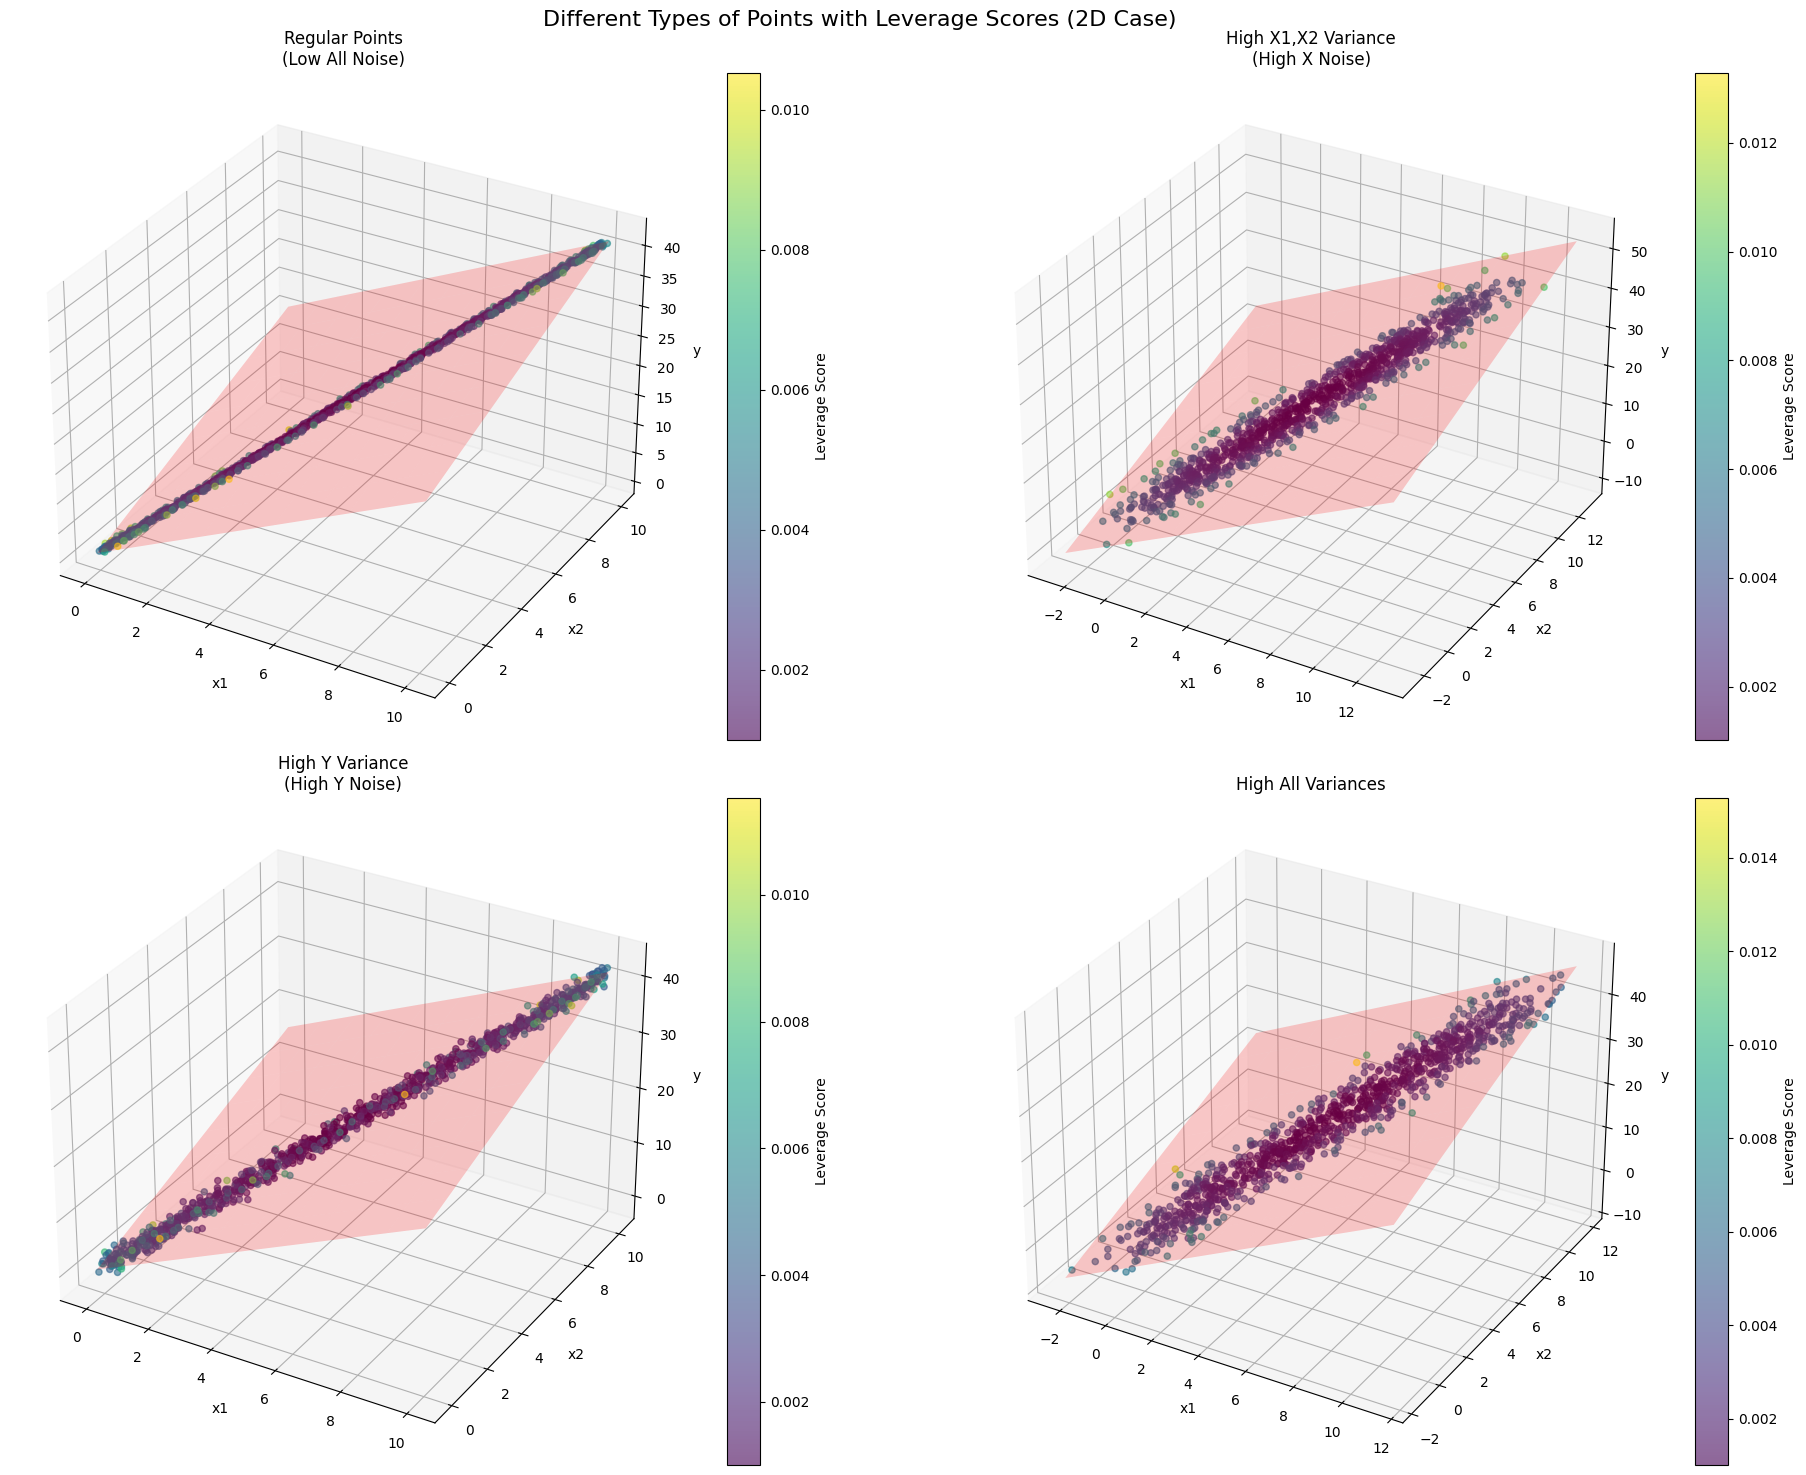

In [5]:

n_samples = 1000
a = 2.5  
b = 1.5  
c = 1.0  
np.random.seed(42)

def generate_points_2d(x1_sigma, x2_sigma, y_sigma, n_points=1000):
    x1_base = np.linspace(0, 10, n_points)
    x2_base = np.linspace(0, 10, n_points)
    
    x1 = x1_base + np.random.normal(0, x1_sigma, n_points)
    x2 = x2_base + np.random.normal(0, x2_sigma, n_points)
    
    epsilon = np.random.normal(0, y_sigma, n_points)
    y = a * x1 + b * x2 + c + epsilon
    
    return x1, x2, y

def compute_leverage_scores_2d(x1, x2):
    x = np.column_stack([x1, x2, np.ones_like(x1)])
    U, _, _ = np.linalg.svd(x, full_matrices=False)
    
    H = U @ U.T
    
    leverage = np.diag(H)
    
    return leverage


# Regular points (low noise)
x1_1, x2_1, y1 = generate_points_2d(0.1, 0.1, 0.1)
# High x1, x2 variance
x1_2, x2_2, y2 = generate_points_2d(1.0, 1.0, 0.1)
# High y variance
x1_3, x2_3, y3 = generate_points_2d(0.1, 0.1, 1.0)
# High all variances
x1_4, x2_4, y4 = generate_points_2d(1.0, 1.0, 1.0)

lev1 = compute_leverage_scores_2d(x1_1, x2_1)
lev2 = compute_leverage_scores_2d(x1_2, x2_2)
lev3 = compute_leverage_scores_2d(x1_3, x2_3)
lev4 = compute_leverage_scores_2d(x1_4, x2_4)

fig = plt.figure(figsize=(20, 15))
fig.suptitle('Different Types of Points with Leverage Scores (2D Case)', fontsize=16)

def plot_points_3d(ax, x1, x2, y, lev, title):
    scatter = ax.scatter(x1, x2, y, c=lev, cmap='viridis', alpha=0.6)
    
    plt.colorbar(scatter, ax=ax, label='Leverage Score')
    
    x1_plane, x2_plane = np.meshgrid(
        np.linspace(min(x1), max(x1), 10),
        np.linspace(min(x2), max(x2), 10)
    )
    y_plane = a * x1_plane + b * x2_plane + c
    ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.2, color='red')
    
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

plot_points_3d(ax1, x1_1, x2_1, y1, lev1, 'Regular Points\n(Low All Noise)')
plot_points_3d(ax2, x1_2, x2_2, y2, lev2, 'High X1,X2 Variance\n(High X Noise)')
plot_points_3d(ax3, x1_3, x2_3, y3, lev3, 'High Y Variance\n(High Y Noise)')
plot_points_3d(ax4, x1_4, x2_4, y4, lev4, 'High All Variances')

plt.tight_layout()
plt.show()

# Ex 2

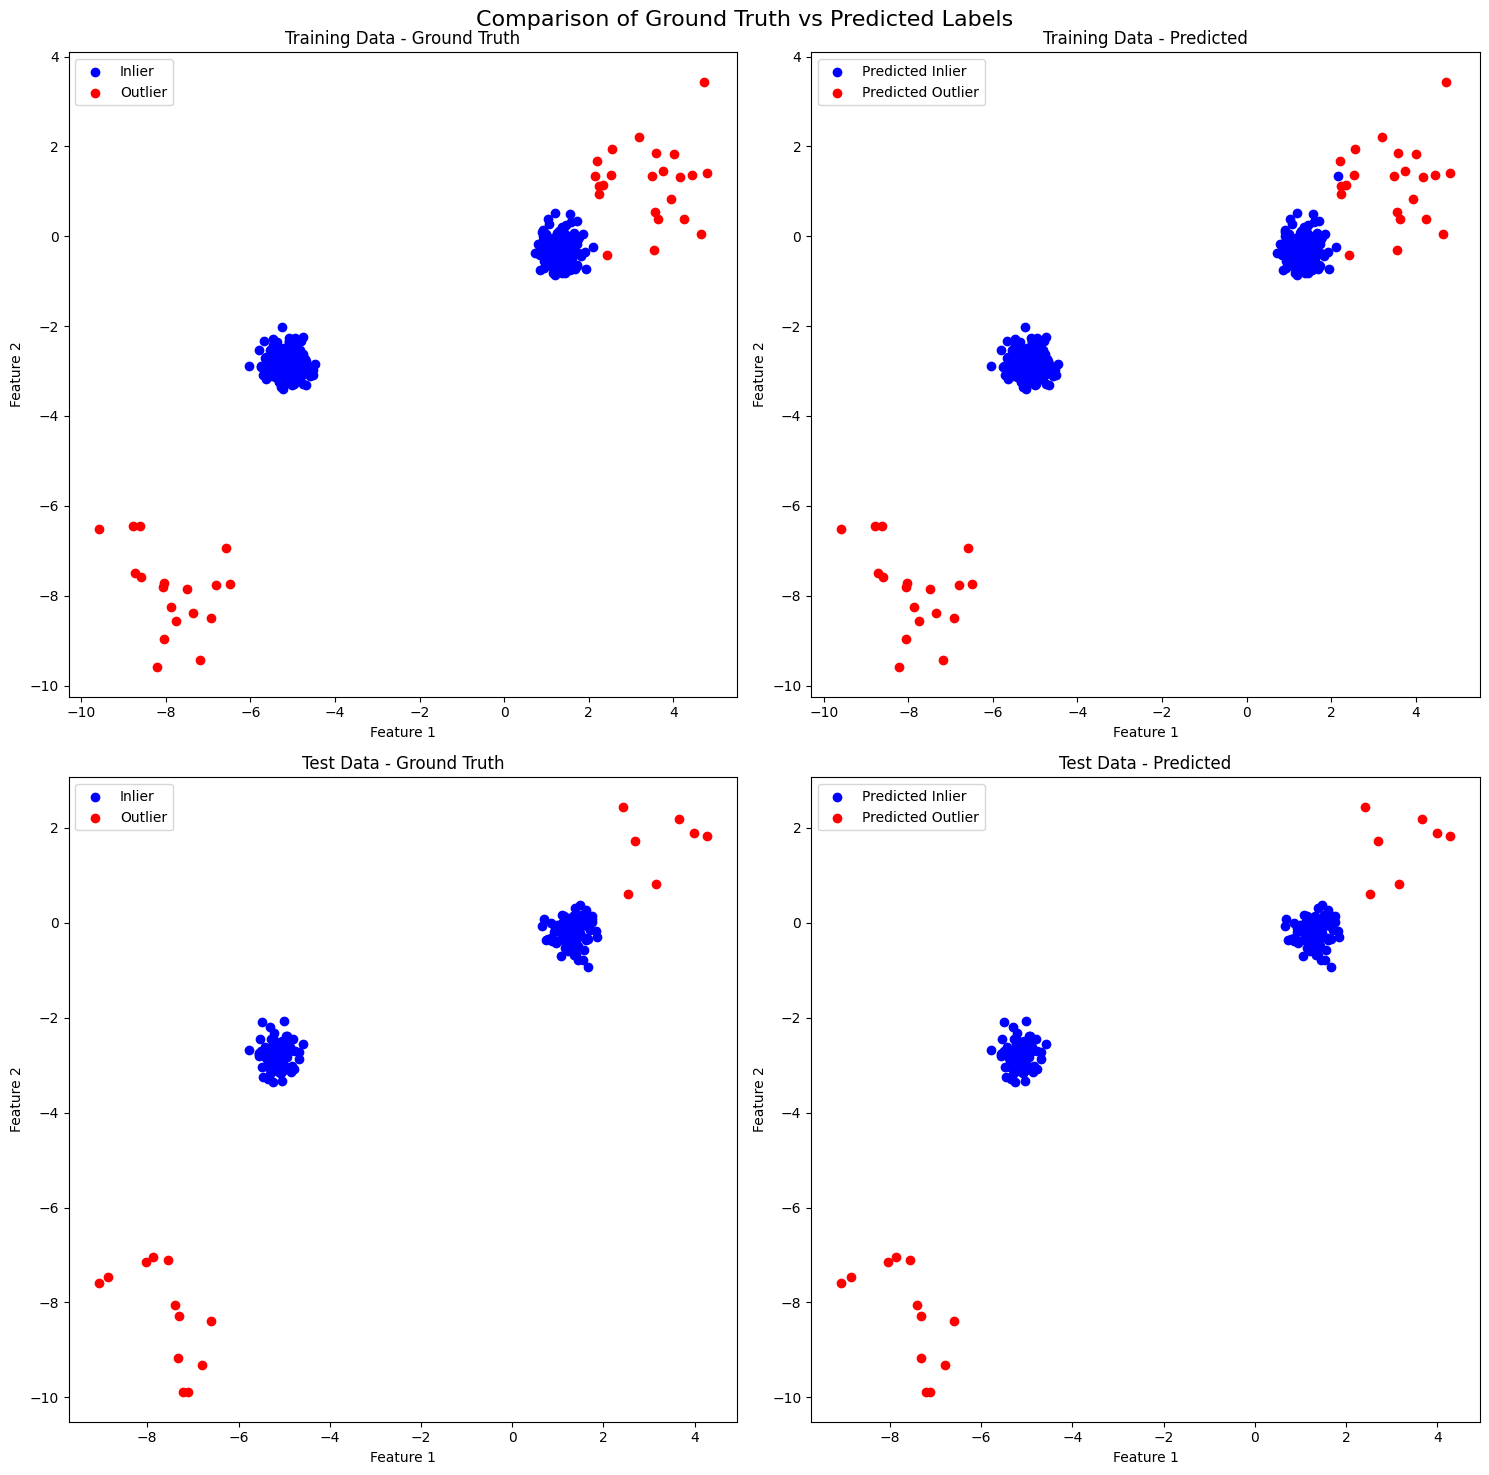

In [27]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data_clusters

X_train, X_test, y_train, y_test = generate_data_clusters(
    n_train=400, 
    n_test=200, 
    n_clusters=2, 
    n_features=2,
    contamination=0.1,
    random_state=42
)

clf = KNN()
clf.fit(X_train)

y_train_pred = clf.labels_

y_test_pred = clf.predict(X_test)  

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Comparison of Ground Truth vs Predicted Labels', fontsize=16)

# Plot training data - Ground Truth
axes[0,0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
                 c='blue', label='Inlier')
axes[0,0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
                 c='red', label='Outlier')
axes[0,0].set_title('Training Data - Ground Truth')
axes[0,0].legend()

# Plot training data - Predicted
axes[0,1].scatter(X_train[y_train_pred==0, 0], X_train[y_train_pred==0, 1], 
                 c='blue', label='Predicted Inlier')
axes[0,1].scatter(X_train[y_train_pred==1, 0], X_train[y_train_pred==1, 1], 
                 c='red', label='Predicted Outlier')
axes[0,1].set_title('Training Data - Predicted')
axes[0,1].legend()

# Plot test data - Ground Truth
axes[1,0].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], 
                 c='blue', label='Inlier')
axes[1,0].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], 
                 c='red', label='Outlier')
axes[1,0].set_title('Test Data - Ground Truth')
axes[1,0].legend()

# Plot test data - Predicted
axes[1,1].scatter(X_test[y_test_pred==0, 0], X_test[y_test_pred==0, 1], 
                 c='blue', label='Predicted Inlier')
axes[1,1].scatter(X_test[y_test_pred==1, 0], X_test[y_test_pred==1, 1], 
                 c='red', label='Predicted Outlier')
axes[1,1].set_title('Test Data - Predicted')
axes[1,1].legend()

for ax in axes.flat:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()

# Ex 3

c:\Python310\lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
c:\Python310\lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
c:\Python310\lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


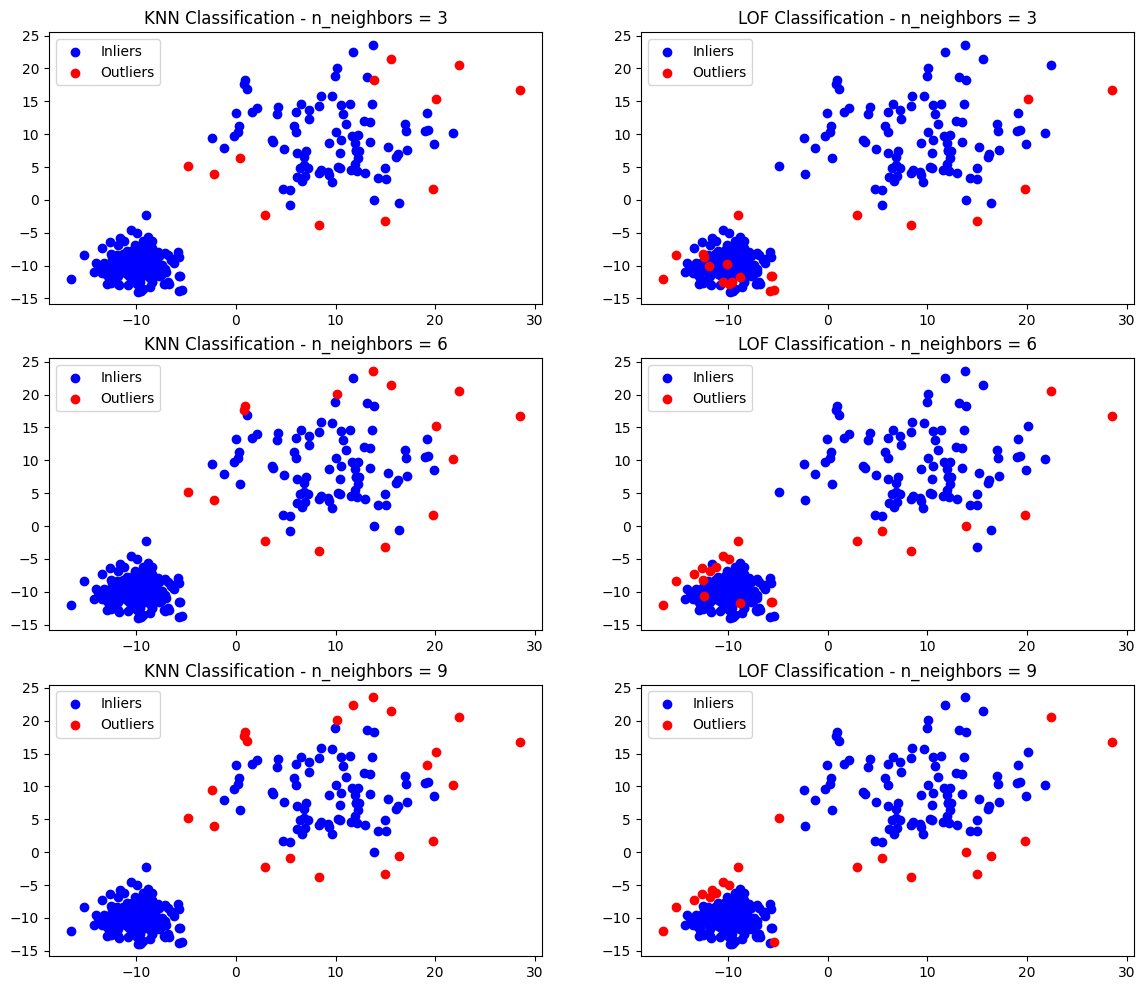

In [26]:
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF

X, y = make_blobs(n_samples=[200, 100], centers=[(-10, -10), (10, 10)], cluster_std=[2, 6], random_state=42)
contamination = 0.07


def knn_model(n_neighbors):
    knn = KNN(n_neighbors=n_neighbors, contamination=contamination)
    knn.fit(X, y)
    return knn.predict(X)

def lof_model(n_neighbors):
    lof = LOF(contamination=contamination, n_neighbors=n_neighbors)
    lof.fit(X)
    return lof.labels_

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 12))

# n_neighbors = 3
knn_labels_3 = knn_model(3)
lof_labels_3 = lof_model(3)

ax1.scatter(X[knn_labels_3 == 0, 0], X[knn_labels_3 == 0, 1], color='blue', label='Inliers')
ax1.scatter(X[knn_labels_3 == 1, 0], X[knn_labels_3 == 1, 1], color='red', label='Outliers')
ax1.set_title("KNN Classification - n_neighbors = 3")
ax1.legend()

ax2.scatter(X[lof_labels_3 == 0, 0], X[lof_labels_3 == 0, 1], color='blue', label='Inliers')
ax2.scatter(X[lof_labels_3 == 1, 0], X[lof_labels_3 == 1, 1], color='red', label='Outliers')
ax2.set_title("LOF Classification - n_neighbors = 3")
ax2.legend()

# n_neighbors = 6
knn_labels_6 = knn_model(6)
lof_labels_6 = lof_model(6)

ax3.scatter(X[knn_labels_6 == 0, 0], X[knn_labels_6 == 0, 1], color='blue', label='Inliers')
ax3.scatter(X[knn_labels_6 == 1, 0], X[knn_labels_6 == 1, 1], color='red', label='Outliers')
ax3.set_title("KNN Classification - n_neighbors = 6")
ax3.legend()

ax4.scatter(X[lof_labels_6 == 0, 0], X[lof_labels_6 == 0, 1], color='blue', label='Inliers')
ax4.scatter(X[lof_labels_6 == 1, 0], X[lof_labels_6 == 1, 1], color='red', label='Outliers')
ax4.set_title("LOF Classification - n_neighbors = 6")
ax4.legend()

# n_neighbors = 9
knn_labels_9 = knn_model(9)
lof_labels_9 = lof_model(9)

ax5.scatter(X[knn_labels_9 == 0, 0], X[knn_labels_9 == 0, 1], color='blue', label='Inliers')
ax5.scatter(X[knn_labels_9 == 1, 0], X[knn_labels_9 == 1, 1], color='red', label='Outliers')
ax5.set_title("KNN Classification - n_neighbors = 9")
ax5.legend()

ax6.scatter(X[lof_labels_9 == 0, 0], X[lof_labels_9 == 0, 1], color='blue', label='Inliers')
ax6.scatter(X[lof_labels_9 == 1, 0], X[lof_labels_9 == 1, 1], color='red', label='Outliers')
ax6.set_title("LOF Classification - n_neighbors = 9")
ax6.legend()

# Ex 4

In [41]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization
from sklearn.metrics import balanced_accuracy_score

data = scipy.io.loadmat('cardio.mat')
X = data['X'] 
y = data['y'].ravel()  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_neighbors_list = np.linspace(30, 120, 10, dtype=int)  
train_scores, test_scores = [], []

for n_neighbors in n_neighbors_list:
    model = LOF(n_neighbors=n_neighbors, contamination=0.07)
    model.fit(X_train_scaled)
    
    train_scores.append(model.decision_scores_)
    test_scores.append(model.decision_function(X_test_scaled))

train_scores_norm = standardizer(np.array(train_scores).T)  
test_scores_norm = standardizer(np.array(test_scores).T)

average_train_score = average(train_scores_norm)
average_test_score = average(test_scores_norm)

max_train_score = maximization(train_scores_norm)
max_test_score = maximization(test_scores_norm)

contamination_rate = 0.07
threshold_avg = np.quantile(average_train_score, 1 - contamination_rate)
threshold_max = np.quantile(max_train_score, 1 - contamination_rate)

y_pred_avg = (average_test_score > threshold_avg).astype(int)
y_pred_max = (max_test_score > threshold_max).astype(int)

ba_avg = balanced_accuracy_score(y_test, y_pred_avg)
ba_max = balanced_accuracy_score(y_test, y_pred_max)

print(f"Balanced Accuracy (Average Strategy): {ba_avg}")
print(f"Balanced Accuracy (Maximization Strategy): {ba_max}")


Balanced Accuracy (Average Strategy): 0.6079268292682927
Balanced Accuracy (Maximization Strategy): 0.6207825203252032
